# Pymaceuticals Inc.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_combined = pd.merge(study_results,mouse_metadata,how='inner',on='Mouse ID')

# Display the data table for preview
mouse_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_combined['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_combined[mouse_combined.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_combined[mouse_combined['Mouse ID'] != duplicate_mice_ids[0]]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [30]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice_clean = clean_df['Mouse ID'].nunique()
num_unique_mice_clean

248

## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
regimen_grouped = clean_df.groupby('Drug Regimen')

# Assemble the resulting series into a single summary DataFrame.
# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_stats_mean = regimen_grouped['Tumor Volume (mm3)'].mean()
summary_stats_median = regimen_grouped['Tumor Volume (mm3)'].median()
summary_stats_variance = regimen_grouped['Tumor Volume (mm3)'].var()
summary_stats_std = regimen_grouped['Tumor Volume (mm3)'].std()
summary_stats_sem = regimen_grouped['Tumor Volume (mm3)'].apply(lambda x: st.sem(x, nan_policy='omit'))

summary_stats = pd.concat([summary_stats_mean, summary_stats_median, summary_stats_variance, summary_stats_std, summary_stats_sem], axis=1)
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 
                         'Tumor Volume Variance', 'Tumor Volume Std. Dev.', ' Tumor Volume Std. Err.']
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

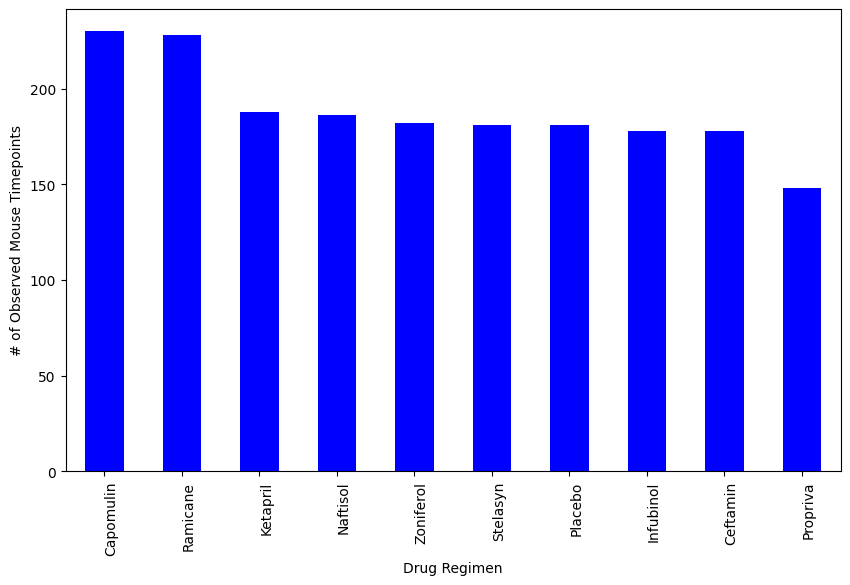

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_count = clean_df['Drug Regimen'].value_counts()
figure1 = regimen_count.plot(kind="bar", facecolor="blue", figsize=(10,6),
                             xlabel="Drug Regimen",ylabel="# of Observed Mouse Timepoints"
                            )
xticklabels = regimen_count.index
figure1.set_xticklabels(xticklabels, rotation=90, rotation_mode="anchor", ha="right", wrap=True)
plt.show()

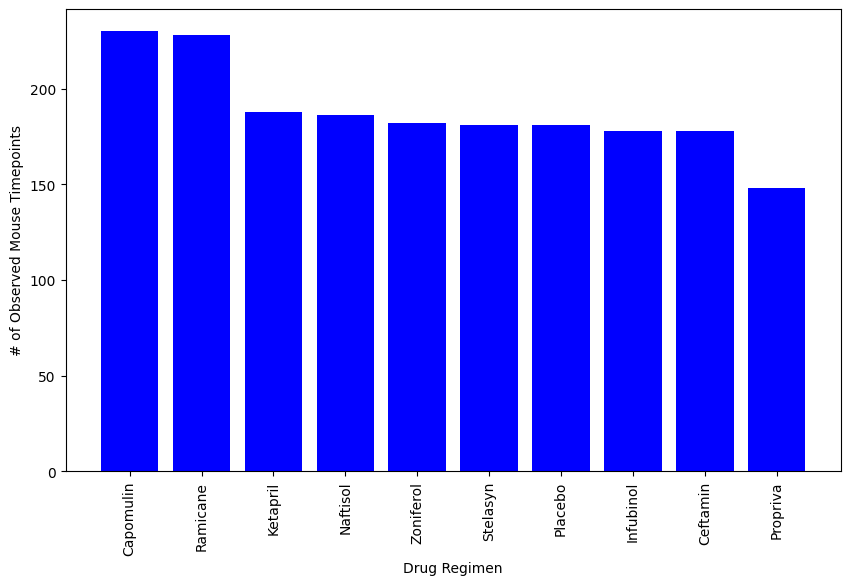

In [34]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_dict = regimen_count.to_dict()
drug_regimen = list(regimen_dict.keys())
counts = list(regimen_dict.values())
plt.figure(figsize=(10, 6))
plt.bar(drug_regimen, counts, color='blue', align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90) 
plt.show() 

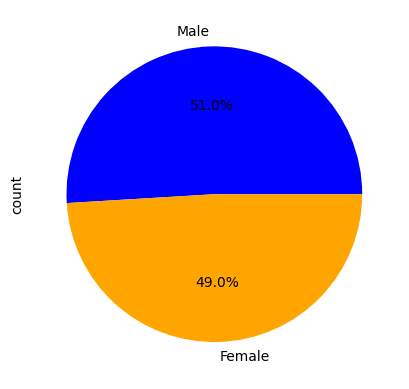

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = clean_df['Sex'].value_counts()
gender_count.plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=['blue', 'orange'])
plt.show()

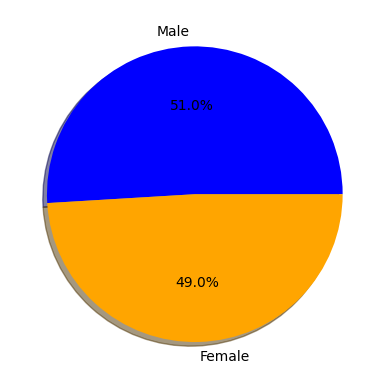

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_dict = gender_count.to_dict()
gender = list(gender_dict.keys())
count = list(gender_dict.values())
colors = ['blue', 'orange']
plt.pie(count, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_df, on=['Mouse ID', 'Drug Regimen', 'Timepoint'], how='left')

In [38]:
# Put treatments into a list for for loop (and later for plot labels)
specified_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in specified_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_data = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == regimen]
    tumor_volume_data = regimen_data['Tumor Volume (mm3)']
    # add subset 
    tumor_volume.append(tumor_volume_data)

for regimen, tumor_data in zip(specified_regimens, tumor_volume):
    quartiles = tumor_data.quantile([0.25, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    IQR = Q3 - Q1
    
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = tumor_data[(tumor_data < lower_bound) | (tumor_data > upper_bound)]
    
    print(f"Potential outliers for {regimen}: {outliers}")

Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


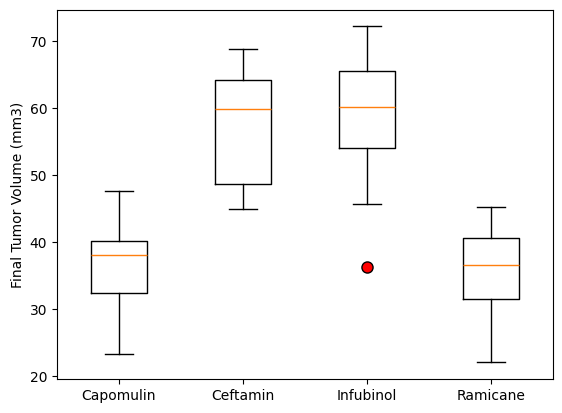

In [39]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
specified_tumor_volumes = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(specified_regimens)]
grouped_data = specified_tumor_volumes.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)

# # Create a box plot
# Highlight potential outliers by changing their color or style
plt.boxplot(grouped_data.values, tick_labels=grouped_data.index, showfliers=True, patch_artist=False, 
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8)
)

# Add labels and title
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

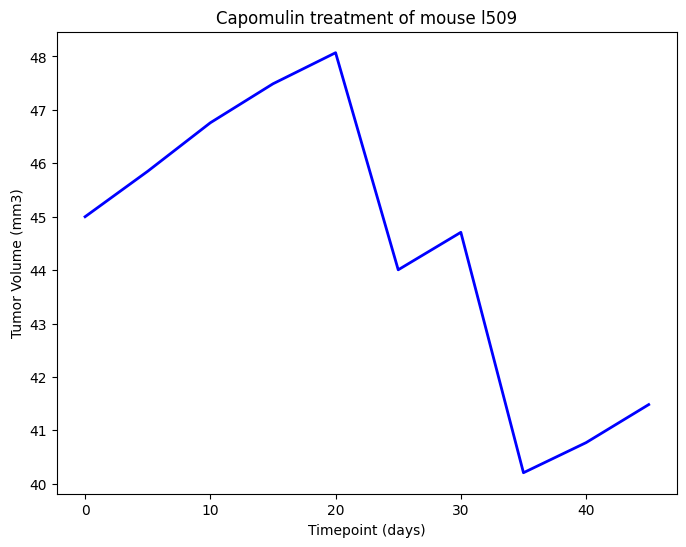

In [40]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
filtered_data = clean_df[(clean_df['Mouse ID'] == mouse_id) & (clean_df['Drug Regimen'] == 'Capomulin')]
time_points = filtered_data['Timepoint']
tumor_volumes = filtered_data['Tumor Volume (mm3)']
plt.figure(figsize=(8, 6))
plt.plot(time_points, tumor_volumes, color='b', linestyle='-', linewidth=2)
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

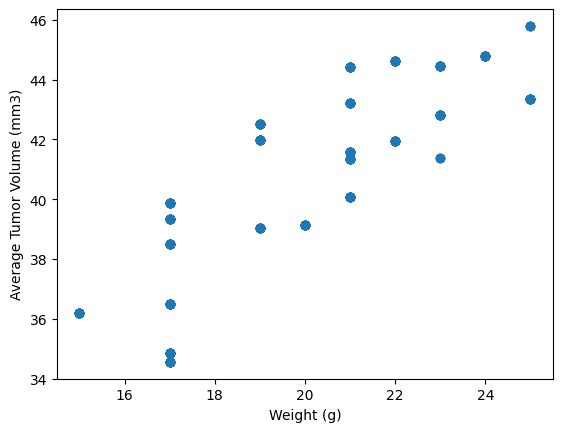

In [41]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
capomulin_merged = pd.merge(capomulin_data, average_tumor_volume, on="Mouse ID")
weight = capomulin_merged['Weight (g)']
tumor_volumes = capomulin_merged['Tumor Volume (mm3)_y']
plt.scatter(weight,tumor_volumes)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


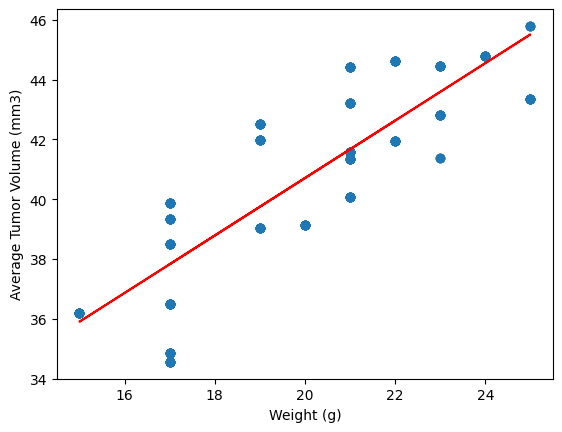

In [42]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(weight,tumor_volumes)
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_volumes)
regress_values = weight * slope + intercept
plt.scatter(weight,tumor_volumes)
plt.plot(weight,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()